In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

datafile = 'BayesianExercise_data.csv'
data = np.loadtxt(datafile, usecols=(0,1,2), delimiter=',', comments='#')

x = data[:,0]
y = data[:,1]
yerr = data[:,2]

def plot_data():
    plt.errorbar(x, y, yerr=yerr, marker='o', markersize=4, ls='', color='k')
    plt.xlim(0,5)
    plt.ylim(5,10)
    return

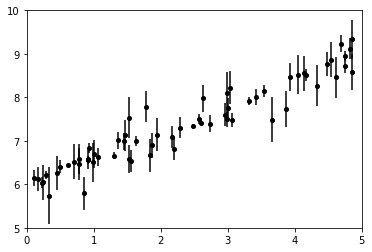

In [2]:
plot_data()

In [4]:
import emcee

In [5]:
def ln_likelihood(x, y, yerr, modelfunc, params):
    model_y = modelfunc(params, x)
    chi = (y - model_y)/yerr
    return -0.5*np.sum(chi**2)

In [6]:
## Prior: all parameter values must be within boundaries set here
BOUNDARIES = [(-100,100),(-100,100),(-100,100),(-100,100)]

def ln_prior(params, bound=BOUNDARIES):
    result = 0.0
    for i in range(len(params)):
        if params[i]<bound[i][0] or params[i]>bound[i][1] : result = -np.inf 
    return result

In [7]:
## Here's a linear model with parameters m and b
def lin_model(params, x):
    m, b = params
    return m*x + b

In [8]:
def lnprob(params, x, y, yerr):
    return ln_likelihood(x, y, yerr, lin_model, params) + ln_prior(params)

In [9]:
NWALKERS = 100
NDIMS    = 2
theta0   = np.zeros(shape=(NWALKERS,NDIMS))

In [10]:
## By eye fit: slope = 3/5 = 0.6, b = 6
## Initialize around those values
theta0[:,0] = np.random.uniform(-100.0,100.0,NWALKERS)
theta0[:,1] = np.random.uniform(-100.0,100.0,NWALKERS)

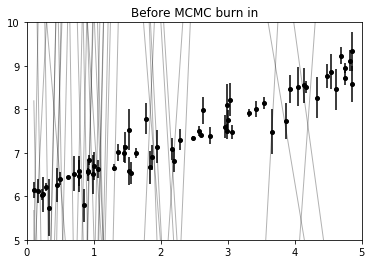

In [11]:
## Plot some of the initial walkers
plot_data()

for theta in theta0:
    plt.plot(x, lin_model(theta,x), 'k-', lw=1, alpha=0.3)

plt.title('Before MCMC burn in')

In [12]:
sampler = emcee.EnsembleSampler(NWALKERS, NDIMS, lnprob, args=[x,y,yerr])

In [13]:
NBURN = 100
theta, prob, state = sampler.run_mcmc(theta0, NBURN)

In [14]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.425


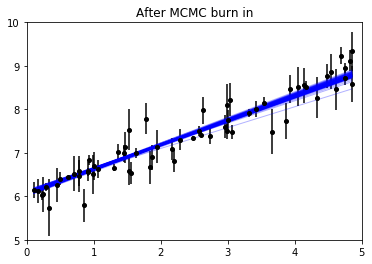

In [15]:
## Plot new walker positions
plot_data()

for th in theta:
    plt.plot(x, lin_model(th,x), 'b-', lw=1, alpha=0.3)

plt.title('After MCMC burn in')